# <center>Instagram Recommendation System

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Exporting data
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram%20data.csv")
data.to_csv('Instagram recommendation system.csv')

# loading data
df = pd.read_csv('Instagram recommendation system.csv')
df

,Unnamed: 0,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,1982,1236,62.361251,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...
172,172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,246,316,128.455285,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...
173,173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,129,100,77.519380,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...
174,174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,418,204,48.803828,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...


In [6]:
# Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       176 non-null    int64  
 1   Date             176 non-null    object 
 2   Impressions      176 non-null    int64  
 3   From Home        176 non-null    int64  
 4   From Hashtags    176 non-null    int64  
 5   From Explore     176 non-null    int64  
 6   From Other       176 non-null    int64  
 7   Saves            176 non-null    int64  
 8   Comments         176 non-null    int64  
 9   Shares           176 non-null    int64  
 10  Likes            176 non-null    int64  
 11  Profile Visits   176 non-null    int64  
 12  Follows          176 non-null    int64  
 13  Conversion Rate  176 non-null    float64
 14  Caption          176 non-null    object 
 15  Hashtags         176 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 22.1+ KB


In [7]:
# Check statistical description of data
df.describe()

,Unnamed: 0,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,87.500000,19685.522727,3647.494318,2592.397727,12683.051136,451.676136,383.034091,7.852273,25.914773,302.761364,177.295455,111.454545,50.993999
std,50.950957,34822.274801,2898.212543,2950.268619,31303.301900,1098.525819,634.694940,4.675871,52.655306,312.225852,518.626541,320.246331,38.803943
min,0.000000,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,0.000000
25%,43.750000,3911.000000,2034.000000,853.000000,216.000000,59.000000,87.750000,5.000000,4.000000,137.750000,19.000000,6.000000,23.076923
50%,87.500000,5919.500000,2520.500000,1693.000000,674.500000,170.000000,155.000000,7.000000,11.000000,195.500000,39.000000,14.000000,38.961039
75%,131.250000,18190.750000,3911.500000,3104.250000,9207.750000,445.500000,390.000000,10.000000,23.000000,316.750000,121.500000,94.500000,69.730392
max,175.000000,226323.000000,18051.000000,21819.000000,208595.000000,12692.000000,4541.000000,28.000000,472.000000,2091.000000,5121.000000,3022.000000,218.181818


In [8]:
# Check for null values
df.isnull().sum()

Unnamed: 0         0
Date               0
Impressions        0
From Home          0
From Hashtags      0
From Explore       0
From Other         0
Saves              0
Comments           0
Shares             0
Likes              0
Profile Visits     0
Follows            0
Conversion Rate    0
Caption            0
Hashtags           0
dtype: int64

In [9]:
# Converting Date column to type, datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Day_of_week'] = df['Date'].dt.day_name()

df

,Unnamed: 0,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags,Day_of_week
0,0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...,Friday
1,1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,Saturday
2,2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,Sunday
3,3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,Monday
4,4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,1982,1236,62.361251,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...,Monday
172,172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,246,316,128.455285,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...,Tuesday
173,173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,129,100,77.519380,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...,Wednesday
174,174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,418,204,48.803828,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...,Thursday


In [10]:
df['Hashtags']

0      #finance #money #business #investing #investme...
1      #healthcare #health #covid #data #datascience ...
2      #data #datascience #dataanalysis #dataanalytic...
3      #python #pythonprogramming #pythonprojects #py...
4      #datavisualization #datascience #data #dataana...
                             ...                        
171    #machinelearning #machinelearningalgorithms #d...
172    #datascience #datasciencejobs #datasciencetrai...
173    #datascience #datasciencejobs #datasciencetrai...
174    #datascience #datasciencejobs #datasciencetrai...
175    #python #pythonprogramming #pythoncode #python...
Name: Hashtags, Length: 176, dtype: object

In [11]:
# Expanded Hashtags List per Post for Individual Analysis

df['Hashtags_list'] = df['Hashtags'].str.split(' ')
hashtags_xplode = df.explode('Hashtags_list')
hashtags_xplode

,Unnamed: 0,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags,Day_of_week,Hashtags_list
0,0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...,Friday,#finance #money #business #investing #investme...
1,1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,Saturday,#healthcare #health #covid #data #datascience ...
2,2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,Sunday,#data #datascience #dataanalysis #dataanalytic...
3,3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,Monday,#python #pythonprogramming #pythonprojects #py...
4,4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,Tuesday,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,1982,1236,62.361251,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...,Monday,#machinelearning #machinelearningalgorithms #d...
172,172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,246,316,128.455285,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...,Tuesday,#datascience #datasciencejobs #datasciencetrai...
173,173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,129,100,77.519380,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...,Wednesday,#datascience #datasciencejobs #datasciencetrai...
174,174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,418,204,48.803828,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...,Thursday,#datascience #datasciencejobs #datasciencetrai...


In [12]:
# Average Daily Engagement Metrics by Day of the Week (Top 10 Days by Impressions)

daily_engagement = df.groupby('Day_of_week').agg({
    'Impressions': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).sort_values(by = 'Impressions', ascending = False).head(10)
daily_engagement

,Impressions,Likes,Comments,Shares
Day_of_week,,,,
Tuesday,28746.48,393.520000,9.320000,50.520000
Monday,23369.48,292.560000,7.080000,16.800000
Sunday,20850.64,337.160000,9.120000,25.640000
Wednesday,19157.12,301.240000,8.040000,24.880000
Saturday,16431.68,279.840000,7.840000,28.920000
Thursday,16099.88,260.640000,6.880000,16.880000
Friday,13395.00,256.230769,6.730769,18.076923


In [13]:
# Top 10 Hashtags by Average Engagement Metrics (Impressions, Likes, Comments, Shares)

hashtag_engagement = hashtags_xplode.groupby('Hashtags_list').agg({
    'Impressions': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).sort_values(by = 'Impressions', ascending = False). head(10)
daily_engagement, hashtag_engagement

(             Impressions       Likes  Comments     Shares
 Day_of_week                                              
 Tuesday         28746.48  393.520000  9.320000  50.520000
 Monday          23369.48  292.560000  7.080000  16.800000
 Sunday          20850.64  337.160000  9.120000  25.640000
 Wednesday       19157.12  301.240000  8.040000  24.880000
 Saturday        16431.68  279.840000  7.840000  28.920000
 Thursday        16099.88  260.640000  6.880000  16.880000
 Friday          13395.00  256.230769  6.730769  18.076923,
                                                       Impressions  \
 Hashtags_list                                                       
 #pythonprogrammer                                   107722.000000   
 #pythonprogramminglanguage                          107722.000000   
 #python3                                            107722.000000   
 #pythoncoding                                       107722.000000   
 #pythondeveloper                               

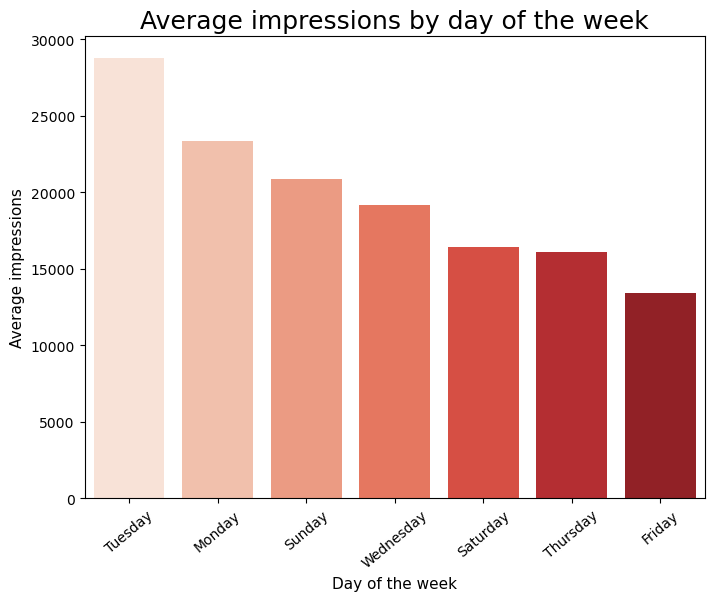

In [14]:
# Average Impressions by day of the week

plt.figure(figsize = (8,6))
sns.barplot(x = daily_engagement.index, y = daily_engagement['Impressions'], palette = 'Reds')
plt.xlabel('Day of the week', fontsize = 11)
plt.ylabel('Average impressions', fontsize = 11)
plt.xticks( rotation = 40)
plt.title('Average impressions by day of the week', fontsize = 18)
plt.show()

Summary: This chart shows that Tuesdays receive the highest average impressions, followed closely by Mondays, indicating that content posted on these two days likely reaches the widest audience. Sundays and Wednesdays also show fairly high engagement but fall below Tuesdays and Mondays. Fridays has the lowest average impressions, with Thursdays and Saturdays slightly higher but still on the lower end

<Figure size 1000x800 with 0 Axes>

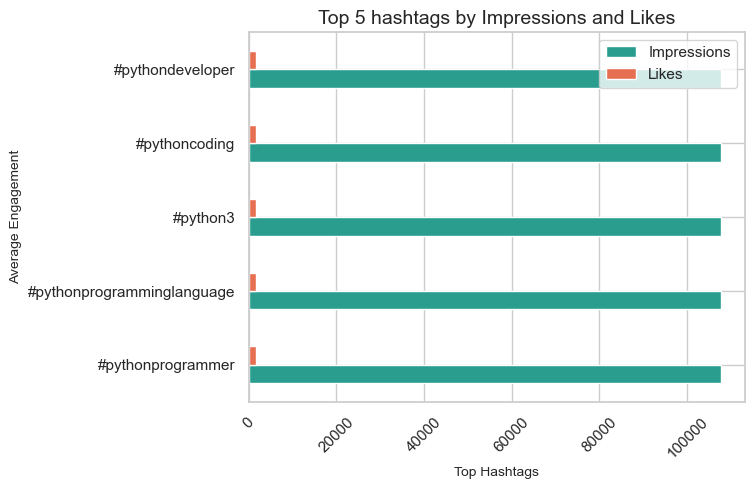

In [15]:
# Comparing Top 5 hashtags by Impressions and likes

plt.figure(figsize = (10, 8))
sns.set(style = "whitegrid")
top_hashtags = hashtag_engagement[['Impressions', 'Likes']].head(5)
top_hashtags.plot(kind = 'barh', color =['#2a9d8f', '#e76f51'])
plt.title('Top 5 hashtags by Impressions and Likes', fontsize = 14)
plt.xlabel('Top Hashtags', fontsize = 10)
plt.ylabel('Average Engagement', fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

This chart highlights the effectiveness of each hashtags in terms of reach *impressions) and interaction (likes). Hashtags like #pythonprogrammer are especially effective for reaching a broad audience.

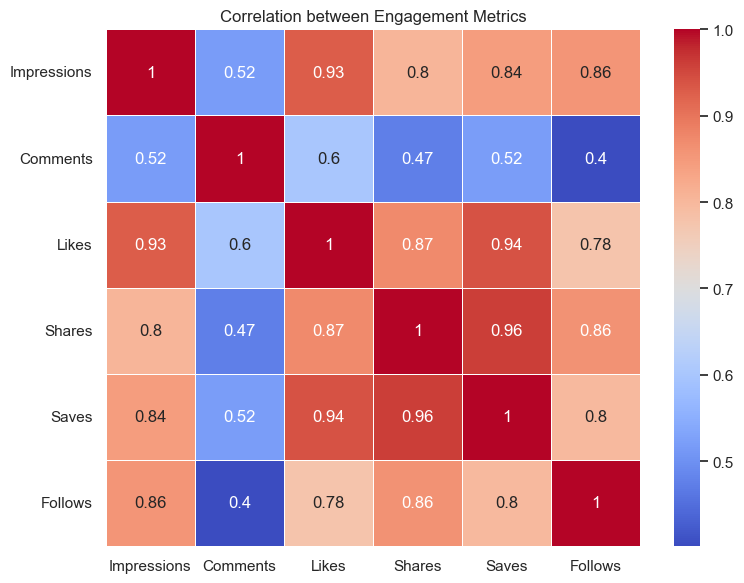

In [16]:
# Checking the correlation between engagement metrics

plt.figure(figsize = (8, 6))
correlation_matrix = df[['Impressions', 'Comments', 'Likes', 'Shares', 'Saves', 'Follows']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation between Engagement Metrics')
plt.tight_layout()
plt.show()

This indicates that there are strong positive correlations between various engagement metrics. Specifically, metrics like Impressions have high correlations with Likes (90%) and Shares (80%), suggesting that increasing Impressions can lead to more Likes and Shares. Additionally, Likes strongly correlate with Shares (87%) and Saves (94%). This means that boosting likes will likely increase shares and saves as well. These relationships suggest that overall engagement and social media strategies can be optimized by focusing on increasing certain metrics like impressions and likes.

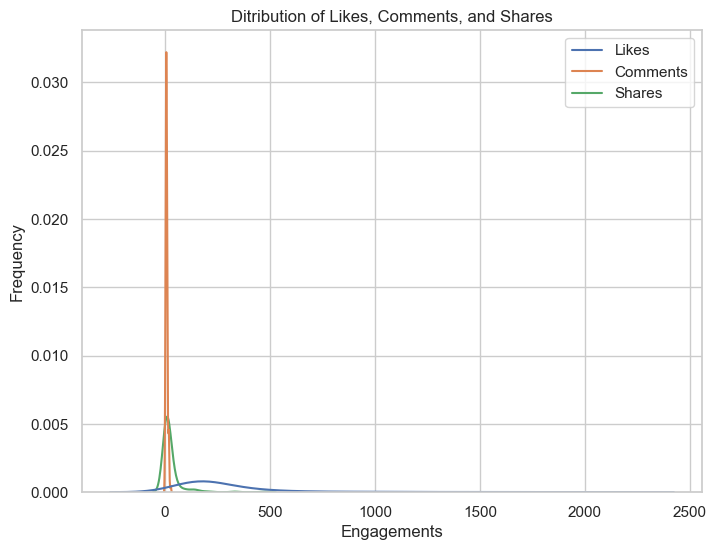

In [17]:
# Visualizing Engagement Metrics Distribution

plt.figure(figsize = (8,6))
sns.kdeplot(df[['Likes', 'Comments', 'Shares']])
plt.title('Ditribution of Likes, Comments, and Shares')
plt.xlabel('Engagements')
plt.ylabel('Frequency')
plt.show()

Summary: Comments are the most consistent engagement type, with a density peak above 0.030 and a spread from 0 to 200. Shares follow, with a peak density around 0.006 and a spread from 0 to 300, suggesting occasional high engagement. Likes are the least frequent, with a lower peak at 0.001 and a wider spread from 0 to 700, indicating that they occur less frequently and are generally low in count.

### Hashtag Recommendation System

In [18]:
def recommend_hashtags(df, frequent = 5):
    hashtag_performance = df.explode('Hashtags_list').groupby('Hashtags_list').agg({
        'Impressions' : 'mean',
        'Likes' : 'mean',
    }).sort_values(by = 'Impressions', ascending = False)
    
    top_hashtags = hashtag_performance.head(frequent).index.tolist()
    return top_hashtags
top_hashtags = recommend_hashtags(df)
print(f'Top 5 Recommended Hashtags: {top_hashtags}')

Top 5 Recommended Hashtags: ['#pythonprogrammer', '#pythonprogramminglanguage', '#python3', '#pythoncoding', '#pythondeveloper']


### Posting day Recommendation System

In [19]:
def posting_day(df, top_n = 3):
    daily_feedback = df.groupby('Day_of_week').agg({
        'Impressions' : 'mean',
        'Likes' : 'mean'
    }).sort_values(by = 'Impressions', ascending = False)
    
    top_days = daily_feedback.head(top_n).index.tolist()
    return top_days
top_days = posting_day(df)
print(f'Recommended Days to Post: {top_days}')

Recommended Days to Post: ['Tuesday', 'Monday', 'Sunday']
